In [21]:
from scipy.io import loadmat
import sys
import numpy as np
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

In [22]:
data = loadmat('ex7faces.mat')
X = data['X']

In [23]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data in a nice grid.

    Parameters
    ----------
    X : array_like
        The input data of size (m x n) where m is the number of examples and n is the number of
        features.

    example_width : int, optional
        THe width of each 2-D image in pixels. If not provided, the image is assumed to be square,
        and the width is the floor of the square root of total number of pixels.

    figsize : tuple, optional
        A 2-element tuple indicating the width and height of figure in inches.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

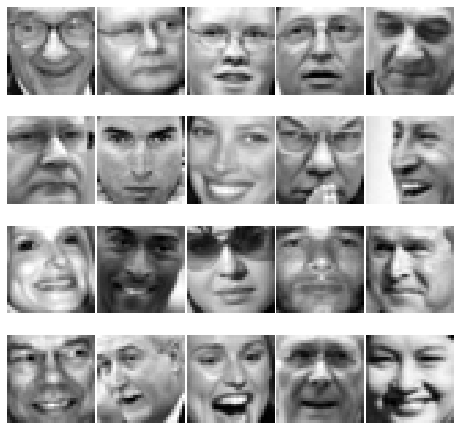

In [24]:
displayData(X[:20, :], figsize=(8, 8))

# Display First 20 eigen vectors

```python
U[:, :k] -> returns first k eigen vectors
```

In [25]:
cov_mat = X.T @ X

In [26]:
U, S, V = np.linalg.svd(cov_mat)

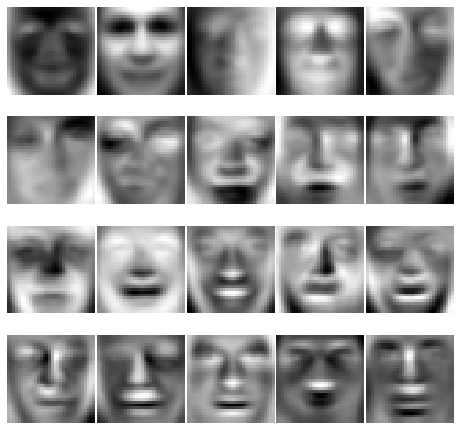

In [27]:
displayData(U[:, :20].T, figsize=(8, 8))

# Let's Compress Reduce Dims

In [28]:
print(X.shape, U.shape)

(5000, 1024) (1024, 1024)


In [58]:
U_red = U[:, :9]
Z = X @ U_red

## Reduced Data

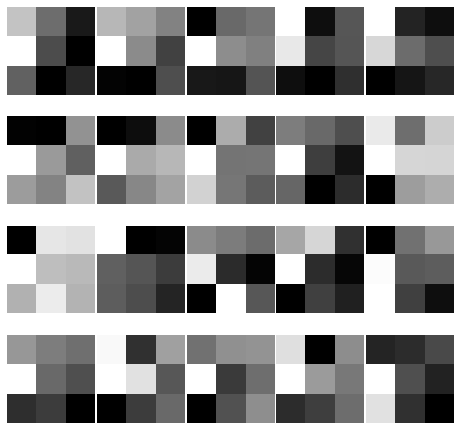

In [59]:
displayData(Z[:20, :], figsize=(8, 8))

# Recover the Data

In [60]:
X_recovered = Z @ U_red.T

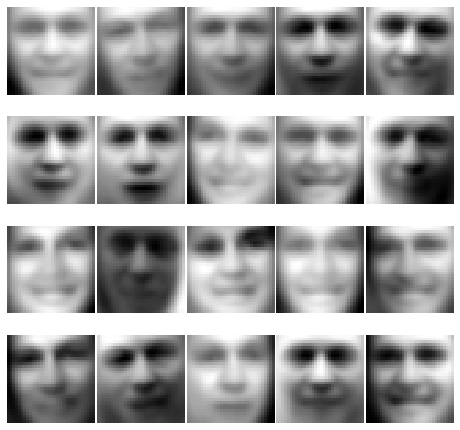

In [61]:
displayData(X_recovered[:20, :], figsize=(8, 8))

Compare it with original

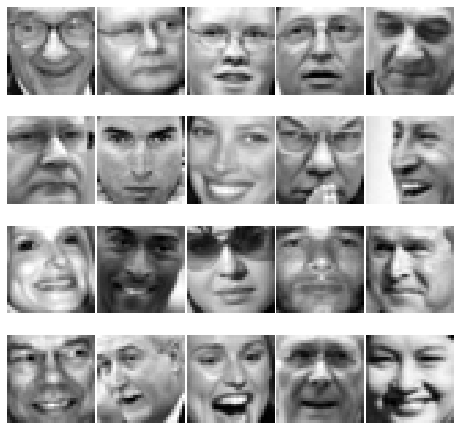

In [62]:
displayData(X[:20, :], figsize=(8, 8))